In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display



In [2]:
aggregated_web_sessions = pd.read_csv("Aggregation of web session log details 12.5.17 101pm ET (with user and time secs elapsed mapping).csv")

In [3]:
train_users_AWprocessed = pd.read_csv('train_users_2_AW_processed.csv')

In [4]:
train_users_joined = pd.merge(train_users_AWprocessed, aggregated_web_sessions, left_on = 'user_id', right_on = 'user_id', how = 'left')

In [5]:
print(train_users_joined)

           user_id date_account_created  timestamp_first_active  \
0       gxn3p5htnn            6/28/2010            2.010000e+13   
1       820tgsjxq7            5/25/2011            2.010000e+13   
2       4ft3gnwmtx            9/28/2010            2.010000e+13   
3       bjjt8pjhuk            12/5/2011            2.010000e+13   
4       87mebub9p4            9/14/2010            2.010000e+13   
5       osr2jwljor             1/1/2010            2.010000e+13   
6       lsw9q7uk0j             1/2/2010            2.010000e+13   
7       0d01nltbrs             1/3/2010            2.010000e+13   
8       a1vcnhxeij             1/4/2010            2.010000e+13   
9       6uh8zyj2gn             1/4/2010            2.010000e+13   
10      yuuqmid2rp             1/4/2010            2.010000e+13   
11      om1ss59ys8             1/5/2010            2.010000e+13   
12      k6np330cm1             1/5/2010            2.010000e+13   
13      dy3rgx56cu             1/5/2010            2.010000e+1

In [6]:
# writer = pd.ExcelWriter('train_users_date_account_create.xlsx')
# train_users_joined['date_account_created'].to_excel(writer,'Sheet1')
# writer.save()

In [7]:
#Assume that the following columns are not important in train_users_joined
#-date_account_created
#-timestamp_first_active
#-date_first_booking

#columns_to_delete = [date_account_created, timestamp_first_active, date_first_booking]

del train_users_joined['date_account_created']
del train_users_joined['timestamp_first_active']
del train_users_joined['date_first_booking']


In [8]:
#fill age with blank cells with -1 to denote that it is missing

train_users_joined['age'].fillna(-1, inplace=True)

In [9]:
#fill first_affiliate_tracked with blank cells with 'missing' to denote that it is missing and for one-hot encoding

train_users_joined['first_affiliate_tracked'].fillna('missing', inplace=True)

In [10]:
#fill all remaining blank cells with -1 (starting from secs_elapsed), to denote that these are missing and to do the same for the test set

train_users_joined.fillna(-1, inplace=True)

In [11]:
# #write to excel and reorder so that the 15,500 users are placed on the top first. Reordered the users based on whether secs elapsed is a positive value or -1 (missing from the data)
# #also created a category that keeps track of the user's age bucket, gender and the country they are going
# writer = pd.ExcelWriter('train_users_joined(placed 15500 first)_test.xlsx')
# train_users_joined.to_excel(writer,'Sheet1')
# writer.save()

In [54]:
train_users_final = pd.read_csv('train_users_joined(placed 15500 first)_test3 12.24.17 430pm ET.csv')

In [55]:
#split the data first so that the first 15500 users are separated out. The remaining data will then be shuffled and these two 
#dataframes will be joined back together 

train_users_final_1of2 = train_users_final[0:15500] #first 15500 users
train_users_final_2of2 = train_users_final[15500:] #split these users out and shuffle

In [56]:
train_users_final_2of2 = train_users_final_2of2.sample(frac=1) #shuffle this dataframe

In [57]:
train_users_final_after_shuffle = pd.concat([train_users_final_1of2, train_users_final_2of2])

In [58]:
#Separate majority and minority classes

#https://elitedatascience.com/imbalanced-classes

train_users_NDF = train_users_final_after_shuffle[train_users_final_after_shuffle.country_destination=='NDF']

train_users_US = train_users_final_after_shuffle[train_users_final_after_shuffle.country_destination=='US']

train_users_other = train_users_final_after_shuffle[train_users_final_after_shuffle.country_destination=='other']

train_users_FR = train_users_final_after_shuffle[train_users_final_after_shuffle.country_destination=='FR']

train_users_IT = train_users_final_after_shuffle[train_users_final_after_shuffle.country_destination=='IT']

train_users_GB = train_users_final_after_shuffle[train_users_final_after_shuffle.country_destination=='GB']

train_users_ES = train_users_final_after_shuffle[train_users_final_after_shuffle.country_destination=='ES']

train_users_CA = train_users_final_after_shuffle[train_users_final_after_shuffle.country_destination=='CA']

train_users_DE = train_users_final_after_shuffle[train_users_final_after_shuffle.country_destination=='DE']

train_users_NL = train_users_final_after_shuffle[train_users_final_after_shuffle.country_destination=='NL']

train_users_AU = train_users_final_after_shuffle[train_users_final_after_shuffle.country_destination=='AU']

train_users_PT = train_users_final_after_shuffle[train_users_final_after_shuffle.country_destination=='PT']

In [59]:
#Upsample minority class

from sklearn.utils import resample

train_users_US_resampled = resample(train_users_US, 
                                 replace=True,     # sample with replacement
                                 n_samples=124543,    # to match NDF class
                                 random_state=123) 

train_users_other_resampled = resample(train_users_other, 
                                 replace=True,     # sample with replacement
                                 n_samples=124543,    # to match NDF class
                                 random_state=123) 

train_users_FR_resampled = resample(train_users_FR, 
                                 replace=True,     # sample with replacement
                                 n_samples=124543,    # to match NDF class
                                 random_state=123) 

train_users_IT_resampled = resample(train_users_IT, 
                                 replace=True,     # sample with replacement
                                 n_samples=124543,    # to match NDF class
                                 random_state=123)

train_users_GB_resampled = resample(train_users_GB, 
                                 replace=True,     # sample with replacement
                                 n_samples=124543,    # to match NDF class
                                 random_state=123)

train_users_ES_resampled = resample(train_users_ES, 
                                 replace=True,     # sample with replacement
                                 n_samples=124543,    # to match NDF class
                                 random_state=123)

train_users_CA_resampled = resample(train_users_CA, 
                                 replace=True,     # sample with replacement
                                 n_samples=124543,    # to match NDF class
                                 random_state=123)

train_users_DE_resampled = resample(train_users_DE, 
                                 replace=True,     # sample with replacement
                                 n_samples=124543,    # to match NDF class
                                 random_state=123)

train_users_NL_resampled = resample(train_users_NL, 
                                 replace=True,     # sample with replacement
                                 n_samples=124543,    # to match NDF class
                                 random_state=123)

train_users_AU_resampled = resample(train_users_AU, 
                                 replace=True,     # sample with replacement
                                 n_samples=124543,    # to match NDF class
                                 random_state=123)

train_users_PT_resampled = resample(train_users_PT, 
                                 replace=True,     # sample with replacement
                                 n_samples=124543,    # to match NDF class
                                 random_state=123)

In [61]:
# Combine majority class with upsampled minority class
train_users_proper_sample = pd.concat([train_users_NDF, train_users_US_resampled, train_users_other_resampled, train_users_FR_resampled, train_users_IT_resampled, train_users_GB_resampled, train_users_ES_resampled, train_users_CA_resampled, train_users_DE_resampled, train_users_NL_resampled, train_users_AU_resampled, train_users_PT_resampled])
 
# Show the total number of records for new dataframe
train_users_proper_sample.country_destination.value_counts()

MemoryError: 

In [53]:
#del train_users_proper_sample['date_first_bookingmonthyear']

KeyError: 'date_first_bookingmonthyear'

In [ ]:
#delete user_id so that one-hot encoding does not throw a memory error

del train_users_proper_sample['user_id']

In [ ]:
# Split the data into features and target label
country_raw = train_users_proper_sample['country_destination']
features_raw = train_users_proper_sample.drop('country_destination', axis = 1)



In [51]:
# TODO: One-hot encode features and country data
features_one_hot = pd.get_dummies(features_raw)

# TODO: Encode the 'country_raw' data to numerical values
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
le.fit(country_raw)
country = le.transform(country_raw)

# Print the number of features after one-hot encoding
encoded = list(features_one_hot.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
#print encoded

MemoryError: 

In [27]:
#Get the column labels. This is for the step where we convert the scaled numpy to a dataframe

columns_of_features_one_hot = features_one_hot.dtypes.index #https://stackoverflow.com/questions/24901766/python-how-to-get-column-names-from-pandas-dataframe-but-only-for-continuous
print(columns_of_features_one_hot.shape)

(939L,)


In [28]:
index_of_features_one_hot=range(0,1494516) #Get the row labels. This is for the step where we convert the scaled numpy to a dataframe

In [29]:
#https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num
#using this instead of StandardScaler so that the resulting output is a dataframe
from sklearn.preprocessing import StandardScaler

features_scaled = StandardScaler().fit_transform(features_one_hot.values)

features_scaled_df = pd.DataFrame(features_scaled, index=index_of_features_one_hot, columns=columns_of_features_one_hot)


In [30]:
features_scaled_df.head()

,age,signup_flow,secs_elapsed,lookup,search_results,personalize,index,similar_listings,ajax_refresh_subtotal,show,...,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser,PTMale100+_ -,PTMale100+_0
0,-1.352092,3.688339,57.701657,0.096543,0.067909,0.102756,0.238548,0.265434,0.178201,0.001628,...,-0.006941,-0.002004,-0.007178,-0.000818,-0.004007,-0.003566,-0.003837,-0.004839,1.654464,-1.654464
1,-1.352092,3.688339,55.763782,0.096543,0.067909,0.102756,0.238548,0.265434,0.178201,0.001628,...,-0.006941,-0.002004,-0.007178,-0.000818,-0.004007,-0.003566,-0.003837,-0.004839,1.654464,-1.654464
2,-1.352092,3.688339,49.950246,0.096543,0.067909,0.102756,0.238548,0.265434,0.178201,0.001628,...,-0.006941,-0.002004,-0.007178,-0.000818,-0.004007,-0.003566,-0.003837,-0.004839,1.654464,-1.654464
3,-1.352092,3.688339,43.513806,0.096543,0.067909,0.102756,0.238548,0.265434,0.178201,0.001628,...,-0.006941,-0.002004,-0.007178,-0.000818,-0.004007,-0.003566,-0.003837,-0.004839,1.654464,-1.654464
4,-1.352092,3.526626,43.503529,0.096543,0.067909,0.102756,0.238548,0.265434,0.178201,0.001628,...,-0.006941,-0.002004,-0.007178,-0.000818,-0.004007,-0.003566,-0.003837,-0.004839,1.654464,-1.654464


In [23]:
#features_scaled_df 

In [31]:
# Import train_test_split
from sklearn.model_selection import train_test_split

#Now that the 15,500 users with web sessions are on the top and the remaining users have been shuffled, we can call train_test_split with shuffle equals false so
#we make sure that those 15,500 users are in the training set and the validation set has the same data distribution as the test set
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled_df, 
                                                    country, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    shuffle = False)


# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 1195612 samples.
Testing set has 298904 samples.


In [33]:
#convert y_test to have 12 columns since the output of multi_target_forest.predict_proba(X_test) is also an array with 12 columns

array_to_compare_predictions=[]
nested_array=[]
for element in y_test:
    i=0
    nested_array=[]
    while i < 12:
        if i == element:
            nested_array.append(1)
            i=i+1
        else:
            nested_array.append(0)
            i=i+1
    array_to_compare_predictions.append(nested_array)
        
print(array_to_compare_predictions)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [36]:
len(array_to_compare_predictions)

298904

In [37]:
#convert array_to_compare_predictions into an array and assign it as true values or ground truth

true_values  =np.asarray(array_to_compare_predictions)

In [38]:
label_spelled_out = ['AU', 'DE', 'NL', 'PT', 'IT', 'ES', 'GB', 'CA', 'FR', 'other', 'US', 'NDF']

In [39]:
sort_label_spelled_out = sorted(label_spelled_out)

In [29]:
#https://stackoverflow.com/questions/6422700/how-to-get-indices-of-a-sorted-array-in-python
#https://stackoverflow.com/questions/6193498/pythonic-way-to-find-maximum-value-and-its-index-in-a-list
#https://stackoverflow.com/questions/5284646/rank-items-in-an-array-using-python-numpy

#The following operations will go through each array and provides a rank of that number within the array. Values with a rank 12, is the largest number

# import operator

# maximal_value_tracking_index =[]

# for element in predictions:
#     order = element.argsort()
#     rank = order.argsort()
#     maximal_value_tracking_index.append(rank+1)

In [40]:
import math

def calculate_nDCG(x):
    nDCG = [] 
    for element in x:
        nDCG.append((2 - 1)/math.log(element+1, 2))
    return nDCG

In [41]:
# #This line will go through each element in the maximal_value_tracking_index (which is a list that keeps track of the rank of the predictions)
# #and compares it y_test. If a given array has the same value, then a 1 is placed into index_for_DCG, otherwise the rank of a given country in predictions (referencing the correct country from y_test)
# #will be appended to index_for_DCG. Ideal case is an index of all 1's

from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
import numpy as np
import operator
import time 

#convert y_train to the appropriate dimension
y2 = y_train
Y = np.vstack((y_train, y2)).T

clf_A = AdaBoostClassifier(n_estimators= 100, random_state=1)
# clf_B = BaggingClassifier(n_estimators= 100, random_state=1)
# clf_C = DecisionTreeClassifier(random_state=1) 
# clf_D = ExtraTreesClassifier(n_estimators= 100, random_state=1)
# clf_E = GradientBoostingClassifier(n_estimators= 100, random_state=1)
# clf_F = RandomForestClassifier(n_estimators= 100, random_state=1)

results = {} #create a dictionary for the results
for clf in [clf_A]:
    tic = time.time()      #start the timer
    clf_name = clf.__class__.__name__ #assign the classifier name to the clf_name variable
    clf_specific = clf 
    
    multi_target = MultiOutputClassifier(clf_specific, n_jobs=-1) #jobs is the number of core to use. Since it is set to -1, all cores are being used
    multi_target.fit(X_train, Y).predict(X_train) 
    predictions = multi_target.predict_proba(X_test)[0] #this will return an array with 12 columns that predicts the probability of the new user going to each country
    maximal_value_tracking_index =[]

    for element in predictions:
        order = element.argsort()
        rank = order.argsort()
        maximal_value_tracking_index.append(rank+1)

    
    index_for_DCG =[]
    
    i=0
    for rank_element in maximal_value_tracking_index:
        if rank_element[y_test[i]] == 12: #maximal probability
            index_for_DCG.append(1)
        else:
            if rank_element[y_test[i]] == 1:  #1 is a special number to mean that both the prediction and true value matches. In this line, 1 means the prediction was ranked last
                index_for_DCG.append(12)
            else:
                index_for_DCG.append(rank_element[y_test[i]])        
        i=i+1

    calculate_nDCG(index_for_DCG)
    toc = time.time() #stop the timer 
    total_time = toc - tic 
    results[clf_name] = [sum(calculate_nDCG(index_for_DCG))/float(len(calculate_nDCG(index_for_DCG))), total_time]
    
print(results)

{'AdaBoostClassifier': [0.38911818482342503, 3574.428999900818]}


Model Tuning

In [33]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
# TODO: Initialize the classifier

clf = AdaBoostClassifier(random_state=1)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}

parameters = {'n_estimators': [50, 200, 300, 400, 500], 
              'learning_rate': [0.2, 0.4, 0.6, 0.8, 1], 
              }

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring='accuracy')

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))



Optimized Model
------
Final accuracy score on the testing data: 0.6350


In [34]:
# #https://stackoverflow.com/questions/22155953/how-to-print-out-an-accuracy-score-for-each-combination-within-gridsearch

from pprint import pprint
pprint(grid_obj.grid_scores_)

[mean: 0.61787, std: 0.00685, params: {'n_estimators': 50, 'learning_rate': 0.2},
 mean: 0.62777, std: 0.00407, params: {'n_estimators': 200, 'learning_rate': 0.2},
 mean: 0.62857, std: 0.00401, params: {'n_estimators': 300, 'learning_rate': 0.2},
 mean: 0.62889, std: 0.00294, params: {'n_estimators': 400, 'learning_rate': 0.2},
 mean: 0.62911, std: 0.00303, params: {'n_estimators': 500, 'learning_rate': 0.2},
 mean: 0.62508, std: 0.00303, params: {'n_estimators': 50, 'learning_rate': 0.4},
 mean: 0.62878, std: 0.00304, params: {'n_estimators': 200, 'learning_rate': 0.4},
 mean: 0.62901, std: 0.00304, params: {'n_estimators': 300, 'learning_rate': 0.4},
 mean: 0.62888, std: 0.00305, params: {'n_estimators': 400, 'learning_rate': 0.4},
 mean: 0.62902, std: 0.00273, params: {'n_estimators': 500, 'learning_rate': 0.4},
 mean: 0.62608, std: 0.00567, params: {'n_estimators': 50, 'learning_rate': 0.6},
 mean: 0.62896, std: 0.00318, params: {'n_estimators': 200, 'learning_rate': 0.6},
 mean: 

C:\Users\Owner\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [35]:
grid_obj.best_params_

{'learning_rate': 0.2, 'n_estimators': 500}

In [38]:
#TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
# TODO: Initialize the classifier

clf_Rand = AdaBoostClassifier(random_state=1)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}

parameters = {'n_estimators': [50, 200, 300, 400, 500], 
              'learning_rate': [0.2, 0.4, 0.6, 0.8, 1], 
              }

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj_Rand = RandomizedSearchCV(clf_Rand, parameters, scoring='accuracy')

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit_Rand = grid_obj_Rand.fit(X_train, y_train)

# Get the estimator
best_clf_Rand = grid_fit_Rand.best_estimator_

# Make predictions using the unoptimized and model
best_predictions_Rand = best_clf_Rand.predict(X_test)

# Report the before-and-afterscores
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions_Rand))



Optimized Model
------
Final accuracy score on the testing data: 0.6324


In [39]:
grid_obj_Rand.best_params_

{'learning_rate': 0.4, 'n_estimators': 500}

In [40]:
#Running Optimal Model

from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
import numpy as np
import operator
import time 

#convert y_train to the appropriate dimension
y2 = y_train
Y = np.vstack((y_train, y2)).T

clf_Optimized = AdaBoostClassifier(n_estimators=500, learning_rate=0.2, random_state=1)

results = {} #create a dictionary for the results
for clf in [clf_Optimized]:
    tic = time.time()      #start the timer
    clf_name = clf.__class__.__name__ #assign the classifier name to the clf_name variable
    clf_specific = clf 
    
    multi_target = MultiOutputClassifier(clf_specific, n_jobs=-1) #jobs is the number of core to use. Since it is set to -1, all cores are being used
    multi_target.fit(X_train, Y).predict(X_train) 
    predictions = multi_target.predict_proba(X_test)[0] #this will return an array with 12 columns that predicts the probability of the new user going to each country
    maximal_value_tracking_index =[]

    for element in predictions:
        order = element.argsort()
        rank = order.argsort()
        maximal_value_tracking_index.append(rank+1)

    
    index_for_DCG =[]
    
    i=0
    for rank_element in maximal_value_tracking_index:
        if rank_element[y_test[i]] == 12: #maximal probability
            index_for_DCG.append(1)
        else:
            if rank_element[y_test[i]] == 1:  #1 is a special number to mean that both the prediction and true value matches. In this line, 1 means the prediction was ranked last
                index_for_DCG.append(12)
            else:
                index_for_DCG.append(rank_element[y_test[i]])        
        i=i+1

    calculate_nDCG(index_for_DCG)
    toc = time.time() #stop the timer 
    total_time = toc - tic 
    results[clf_name] = [sum(calculate_nDCG(index_for_DCG))/float(len(calculate_nDCG(index_for_DCG))), total_time]
    
print(results)

#https://stackoverflow.com/questions/34214087/how-do-you-access-tree-depth-in-pythons-scikit-learn

{'AdaBoostClassifier': [0.7428121902510763, 893.5920000076294]}


Feature Importance

In [41]:
# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier

model = AdaBoostClassifier(n_estimators=500, learning_rate=0.2, random_state=1).fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_


In [42]:
import visuals as vs

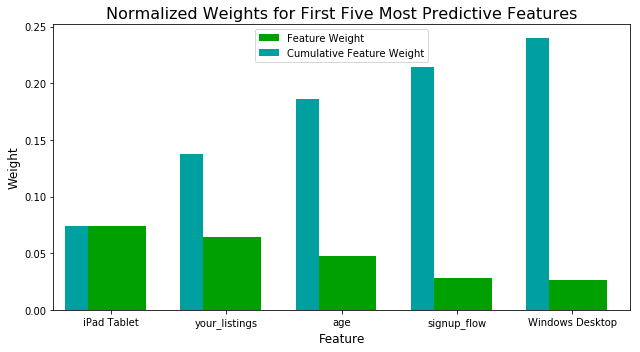

In [43]:
# Plot
vs.feature_plot(importances, X_train, y_train)

In [44]:
#importances

In [45]:
indices = np.argsort(importances)[::-1]
columns = X_train.columns.values[indices[:]]
values = importances[indices][:80]

In [46]:
columns

array(['iPad Tablet', 'your_listings', 'age', 'signup_flow',
       'Windows Desktop', 'Mac Desktop', 'signup_method_basic', 'set_user',
       'secs_elapsed', 'submit', 'confirm_email_link',
       'affiliate_channel_other', 'gender_MALE',
       'first_affiliate_tracked_product', 'signup_app_Web',
       'first_device_type_Android Tablet', 'message_post',
       'Mental Distance to CA', 'affiliate_channel_content',
       'first_browser_Mobile Safari', 'first_device_type_Mac Desktop',
       'confirm_email', 'message_post.1', 'affiliate_channel_api',
       'gender_-unknown-', '#NAME?', 'first_device_type_iPhone',
       'first_affiliate_tracked_tracked-other',
       'first_affiliate_tracked_missing', '#NAME?.1',
       'request_new_confirm_email', 'affiliate_channel_sem-brand',
       'ajax_refresh_subtotal', 'affiliate_channel_sem-non-brand',
       'about_us', 'first_browser_Firefox', 'first_browser_Chrome',
       'request_new_confirm_email.1', 'affiliate_provider_bing',
       

In [47]:
len(columns)

939

In [48]:
sum(values)

0.80200000000000049

In [3]:
# import visualsPCA as vsPCA

# from sklearn.decomposition import PCA

# # TODO: Apply PCA by fitting the good data with the same number of dimensions as features
# pca = PCA(n_components=1112) 
# pca.fit(features_scaled_df)


# # Generate PCA results plot
# pca_results = vsPCA.pca_results(features_scaled_df, pca)
# print pca_results['Explained Variance'].cumsum()

In [4]:
#Import test set

In [8]:
test_users_AW_processed = pd.read_csv('test_usersAWrevised.csv')

In [9]:
#Preprocess similar to training set

#columns_to_delete = [date_account_created, timestamp_first_active, date_first_booking]

del test_users_AW_processed['date_account_created']
del test_users_AW_processed['timestamp_first_active']
del test_users_AW_processed['date_first_booking']

#fill age with blank cells with -1 to denote that it is missing

test_users_AW_processed['age'].fillna(-1, inplace=True)

#fill first_affiliate_tracked with blank cells with 'missing' to denote that it is missing and for one-hot encoding

test_users_AW_processed['first_affiliate_tracked'].fillna('missing', inplace=True)

In [10]:
test_users_AW_processed

,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,-unknown-,-1.0,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,-unknown-,-1.0,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,-unknown-,-1.0,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,-unknown-,-1.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
5,szx28ujmhf,FEMALE,28.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome
6,guenkfjcbq,MALE,48.0,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-
7,tkpq0mlugk,-unknown-,-1.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
8,3xtgd5p9dn,-unknown-,-1.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
9,md9aj22l5a,-unknown-,-1.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Firefox


In [11]:
#write to excel to add the same columns as the training set
writer = pd.ExcelWriter('test_users_AW_processed.xlsx')
test_users_AW_processed.to_excel(writer,'Sheet1')
writer.save()